# LAB 3: Linear Transformation and Inverse


# First: you should run this cell

In [18]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math


#import plotter
import matplotlib.pyplot as plt


def plot2d(H):
    x = H[0,:]
    y = H[1,:]
    plt.plot(x, y, 'ro', x, y, 'g-')
    plt.axis([-10, 10, -10, 10])
    plt.grid()

# Question 1: Geometry and Matrices

#### This question uses python to illustrate the geometric meaning of some special types of matrices.at next cell type:
- `plot2d(H)`

H = 
 [[-6 -6 -7  0  7  6  6 -3 -3  0  0 -6]
 [-7  2  1  8  1  2 -7 -7 -2 -2 -7 -7]]


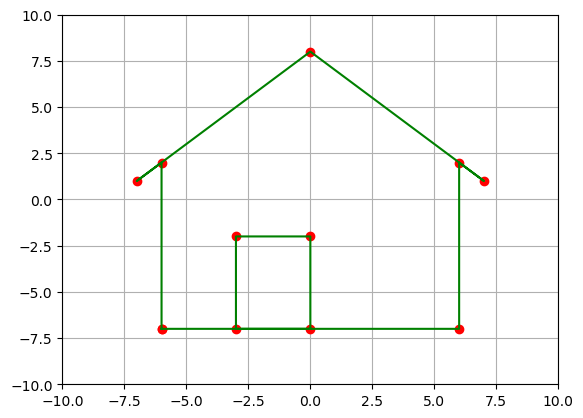

In [19]:
H = np.array([[-6,-6,-7, 0, 7, 6, 6,-3,-3, 0, 0,-6],[-7,2,1,8,1,2,-7,-7,-2,-2,-7,-7 ]])
print('H = \n', H)
plot2d(H)

A graphics window should open and display a crude drawing of a house. The matrix H contains the coordinates
of the endpoints of the line segments making up the drawing.

#### (a) Rotations: Generate a matrix Q and Let Q act on the house by plot2d(Q*H):

- `t = math.pi / 6`
- `Q = np.array([[math.cos(t), -math.sin(t)], [math.sin(t), math.cos(t)]])`
- Caculate `np.linalg.det(Q)`

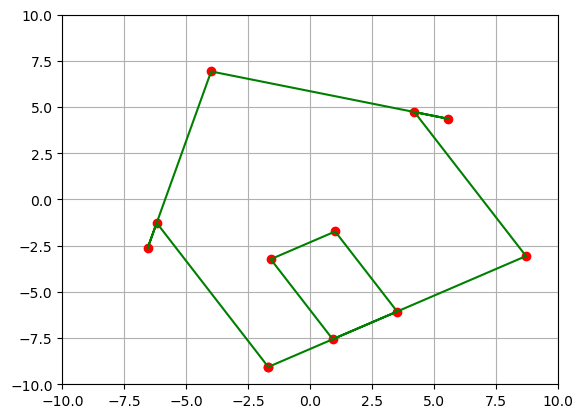

In [5]:
t = math.pi / 6

Q = np.array([[math.cos(t), -math.sin(t)], [math.sin(t), math.cos(t)]])
det_Q=np.linalg.det(Q)
plot2d(Q@H)

##### Repeat this process with t = - pi/3 and answer (i) and (ii) in this case. Print the graph with the three house images on the same figure.

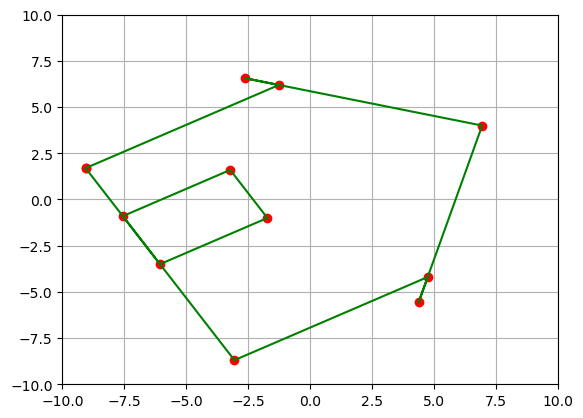

In [7]:
t2 = math.pi/-3
Q2 = np.array([[math.cos(t2), -math.sin(t2)], [math.sin(t2), math.cos(t2)]])
det_Q2=np.linalg.det(Q2)
plot2d(Q2@H)

---Q----
 [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
---Q----
 1.0
---Q----
 [[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]
---Q----
 1.0


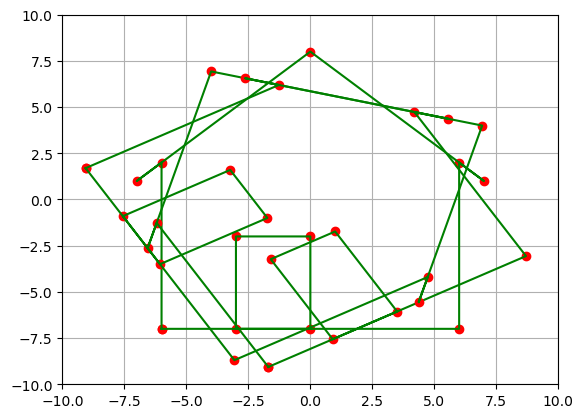

In [10]:
print("---Q----\n",Q)
print("---Q----\n",det_Q)
print("---Q----\n",Q2)
print("---Q----\n",det_Q2)
plot2d(H)
plot2d(Q@H)
plot2d(Q2@H)

--------Q------------
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
---------------------
--------det(Q)------------
1.0
---------------------
--------Q------------
[[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]
---------------------
--------det(Q)------------
1.0
---------------------


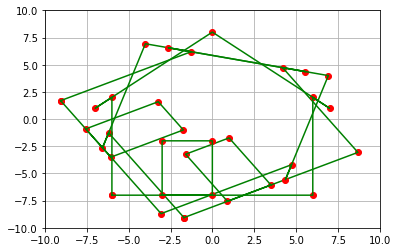

In [3]:
#type your code here:


#### (b) Dilations: Clear the graphics window and generate a new plot of the house as above. Generate a matrix D by
- `r = .9`
- `D = np.array([[r, 0], [0, 1 / r]])`
- Caculate `np.linalg.det(D)`

Let D act on the house by `plot2d(D*H)`.


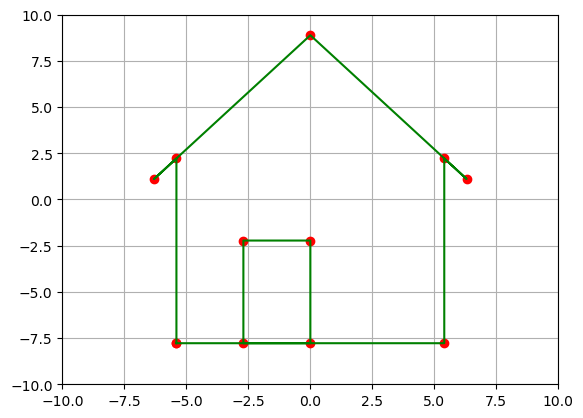

In [12]:
r = .9
D = np.array([[r, 0], [0, 1 / r]])
det_d=np.linalg.det(D)
plot2d(D@H)

#### Repeat this process with r = .8 and answer (i) and (ii) in this case. Print the graph with the three house images on the same figure.

----D----
 [[0.9        0.        ]
 [0.         1.11111111]]
-----det(D)----- 1.0
----D----
 [[0.9        0.        ]
 [0.         1.11111111]]
-----det(D)----- 1.0


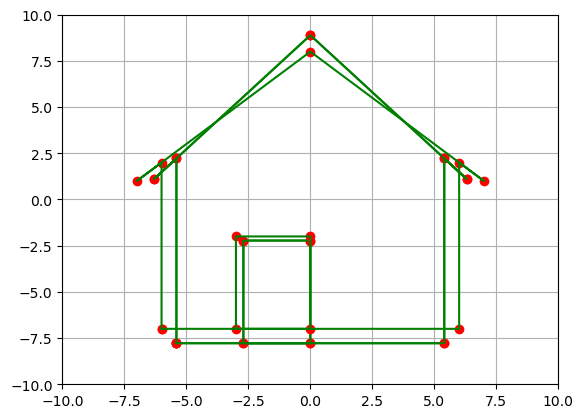

In [15]:
r = .9
D2 = np.array([[r, 0], [0, 1 / r]])
det_d2=np.linalg.det(D2)
print('----D----\n',D)
print('-----det(D)-----',det_d)
print('----D----\n',D2)
print('-----det(D)-----',det_d2)
plot2d(D@H)
plot2d(D2@H)
plot2d(H)

--------D------------
[[0.9        0.        ]
 [0.         1.11111111]]
---------------------
--------det(D)------------
1.0
---------------------
--------D------------
[[0.8  0.  ]
 [0.   1.25]]
---------------------
--------det(D)------------
1.0
---------------------


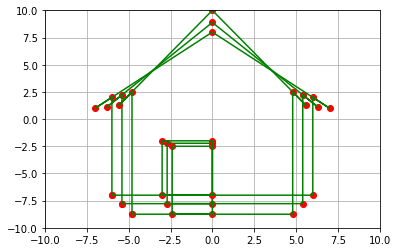

In [4]:
#type your code here:



#### (c) Shearing Transformations: Clear the graphics window and generate a new plot of the house as above. Generate a matrix T by

- `t = 1/2`
- `T = np.array([[1, t], [0, 1]])`
- - Caculate `np.linalg.det(T)`

Now let T act on the house by `plot2d(T*H)`.

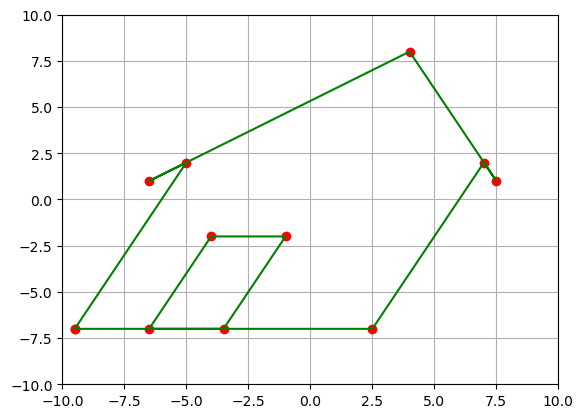

In [21]:
t = 1/2
T = np.array([[1, t], [0, 1]])
det_t=np.linalg.det(T)
plot2d(T@H)

#### Repeat this process with t = - 1/2 and answer (i) and (ii) in this case. Print the graph with the three house images on the same figure

-------T---------
 [[0.9        0.        ]
 [0.         1.11111111]]
-----det(T)------
 1.0
-------T2---------
 [[ 1.  -0.5]
 [ 0.   1. ]]
-----det(T2)------
 1.0


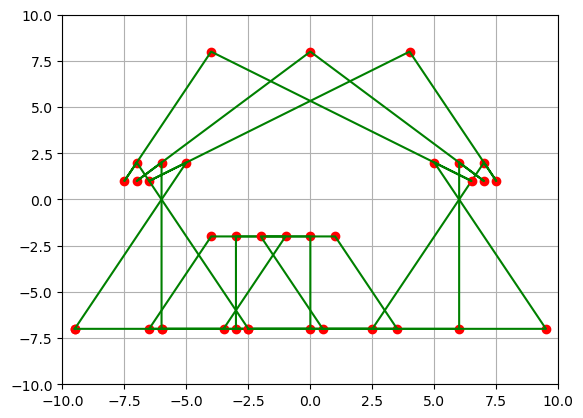

In [23]:
t2 = - 1/2
T2 = np.array([[1, t2], [0, 1]])
det_t2=np.linalg.det(T2)
print("-------T---------\n",D)
print("-----det(T)------\n",det_t)
print("-------T2---------\n",T2)
print("-----det(T2)------\n",det_t2)

plot2d(H)
plot2d(T@H)
plot2d(T2@H)

--------T------------
[[1.  0.5]
 [0.  1. ]]
---------------------
--------det(T)------------
1.0
---------------------
--------T------------
[[ 1.  -0.5]
 [ 0.   1. ]]
---------------------
--------det(T)------------
1.0
---------------------


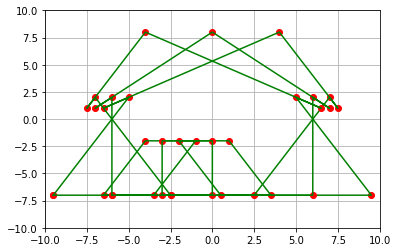

In [5]:
#type your code here:


# Question 2: Solving $Ax = b$

Implementing a function to Solve $Ax = b$ using the inverse of $A$ without using `numpy.linalg.inv`

### Step 1: 

- Define a function that checks that A and b have correct dimensions (number of rows of $A$ = number of rows of $b$). `check_dimensions(A, b)`. Return a `boolean`.

In [50]:
def check_dimensions(A, b):
    ##########type your code here#############
    return A.shape[0] == b.shape[0]
    
    ##########################################

### Step 2:
- Define a function that takes a matrix and check if it is a squared matrix. `check_squared(A)`. Return a `boolean`.

In [51]:
def check_squared(A):
    ##########type your code here#############
    
    return A.shape[0] == A.shape[1]

    ##########################################

### Step 3: 
- Define a function that takes a matrix and the indices of a column and a row and returns the corresponding minor coefficient. `minor_coef(A, i, j)`.

In [60]:
def minor_coef(A, i, j):
    ##########type your code here#############
    # i for row index
    # j for column index 
    
    if  (0 <= i < A.shape[0] and 0 <= j < A.shape[1]):
        minor_A = np.delete(A, i, axis=0)
        minor_A = np.delete(minor_A, j, axis=1)
        minor_coef_A = np.linalg.det(minor_A)
        return minor_coef_A
        
    else:
        return False
     #return np.linalg.det(np.delete(np.delete(A, i, axis=0), j, axis=1))
    ##########################################

### Step 4:
- Define a function that takes a matrix and gives its matrix of minors. `minors(A)`.

In [61]:
def minors(A):
    M = np.zeros(A.shape)
    ##########type your code here#############
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            M[i, j] = minor_coef(A, i, j)
    
    ##########################################
    return M

### Step 5:
- Define a function that takes matrix $A$ gives a matrix of cofactors. `cofactors(A)`

In [62]:
def cofactors(A):
    M = minors(A)
    C = np.zeros(M.shape)
    ##########type your code here#############
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            s= (-1) ** (i + j)
            C[i, j] = s * M[i, j]
    ##########################################
    return C

### Step 6:
- Define a function that takes a matrix and gives its transpose. `transpose(A)`

In [63]:
def transpose(A):
    A_T = np.zeros(A.shape)
    ##########type your code here#############
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            A_T[j, i] = A[i, j]
    ##########################################
    return A_T

### Step 7:
- Code a function that gives the inverse of a matrix. `inverse(A)`.
    - Check first if the matrix is a square matrix. If not raise an error.
    - Check if the matrix is invertible. If not raise an error.

In [64]:
def inverse(A): 
    if not check_squared(A):
        raise Exception('A is not a square matrix.')
    d = np.linalg.det(A)
    if abs(d) < 10 ** -10:
        raise Exception('Singular matrix: A is not invertible.')
    ##########type your code here#############
    A_cofactors = cofactors(A)
    A_adj = transpose(A_cofactors)
    
    det_A = np.linalg.det(A)
    A_inverse =  A_adj  / det_A

    return A_inverse 
    ##########################################

### Step 8:
- Define a function that takes a matrix $A$, a vector $b$ and gives the vector $x$ solution of $Ax = b$. `solve(A, b)`.
- Check dimension first if not raise an error.

In [66]:
def solve(A, b):
    if not check_dimensions(A, b):
        raise Exception('Inconsistent Dimensions.')
    ##########type your code here#############
    A_inv = inverse(A)
    x = np.dot(A_inv, b)
    return x
   ##########################################

### Step 9:
- Use the function `solve` in the previous step to solve the following systems of linear equations:

1) $x + 2y = -1$; $3x + 4y = 1$

2) $3x - 2y + z = 7$; $x + z = 2$; $-2y - z = 3$

In [67]:
A=np.array([[1,2],[3,4]])
print("A=\n",A)

b=np.array( [[-1],[ 1]])
print("\nb=\n",b)

x=solve(A,b)

print("\nx=\n",x)
print("\nA @ x=\n", A@x)

A=
 [[1 2]
 [3 4]]

b=
 [[-1]
 [ 1]]

x=
 [[ 3.]
 [-2.]]

A @ x=
 [[-1.]
 [ 1.]]


In [14]:
#type your code here:


A =
 [[1 2]
 [3 4]]

b =
 [[-1]
 [ 1]]

x =
 [[ 3.]
 [-2.]]

A @ x =
 [[-1.]
 [ 1.]]



In [68]:
A = [[3, -2 ,1],
     [1 , 0 ,1],
     [0 , -2 ,-1]]
print("A=\n", A)

b = [[7],
     [2],
     [3]]
print("\nb=\n", b)

#x=solve(A,b)
x = np.linalg.solve(A, b)
print("\nx=\n", x)

print("\nA @ x=\n", A@x)

A=
 [[3, -2, 1], [1, 0, 1], [0, -2, -1]]

b=
 [[7], [2], [3]]

x=
 [[ 0. ]
 [-2.5]
 [ 2. ]]

A @ x=
 [[7.]
 [2.]
 [3.]]


In [15]:
#type your code here:


A =
 [[ 3 -2  1]
 [ 1  0  1]
 [ 0 -2 -1]]

b =
 [[7]
 [2]
 [3]]

x =
 [[ 0. ]
 [-2.5]
 [ 2. ]]

A @ x =
 [[7.]
 [2.]
 [3.]]



### Step 10:
- Error testing: Run the following cells to test the erros.

In [69]:
A = np.array([[3, -2, 1],
              [1, 0, 1],
              [0, -2, -1]])

b = np.array([[7],
              [2]])

print('A =\n {}\n'.format(A))
print('b =\n {}\n'.format(b))

x = solve(A, b)

A =
 [[ 3 -2  1]
 [ 1  0  1]
 [ 0 -2 -1]]

b =
 [[7]
 [2]]



Exception: Inconsistent Dimensions.

In [70]:
A = np.array([[3, 1],
              [-2, 0],
              [1, 1]])

b = np.array([[7],
              [2],
              [3]])

print('A =\n {}\n'.format(A))
print('b =\n {}\n'.format(b))

x = solve(A, b)

A =
 [[ 3  1]
 [-2  0]
 [ 1  1]]

b =
 [[7]
 [2]
 [3]]



Exception: A is not a square matrix.

In [18]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([[7],
              [2],
              [3]])

print('A =\n {}\n'.format(A))
print('b =\n {}\n'.format(b))

x = solve(A, b)

A =
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

b =
 [[7]
 [2]
 [3]]



Exception: Singular matrix: A is not invertible.